In [1]:
%%capture nop
import os 
IS_KAGGLE = not not os.environ.get('KAGGLE_KERNEL_RUN_TYPE','')
if IS_KAGGLE:
    !git clone https://github.com/Janluke0/PoS-Tagging/
    os.chdir('PoS-Tagging')
    !pip install positional-encodings
else:
    os.chdir('..')


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pytorch_lightning as pl
import torch
GPU = 1 if torch.cuda.is_available() else 0

In [3]:
from dataset.tokenizer import get_tokenizer
from dataset.twtita import mk_dataloaders, TWITADS

import model.recurrent.gru as gru
from model import TokenOfSeqClassifier

TAGS = TWITADS._TAGS

In [4]:
available = ["BPE", "WordPiece","BERT_pretrained", "ELECTRA_pretrained", "ROBERTA_pretrained", "DBERT_pretrained"]

In [5]:
def mk4tknzr(name):
    tknzr = get_tokenizer('resampled_train',name)
    ntags, dl_train = mk_dataloaders(tknzr,['resampled_train'],batch_size=128)
    vocab = tknzr.vocab_size if hasattr(tknzr,'vocab_size')  else tknzr.get_vocab_size()
    _, dl_val = mk_dataloaders(tknzr,['resampled_validation'], shuffle=False,batch_size=128)
    model =  gru.TokenOfSeqClassifier(d_input=vocab, d_model=64, d_output=ntags, dropout=0.1)
    pl_model = TokenOfSeqClassifier(model, 
                                    nclass=len(TAGS),
                                    label_idx_to_ignore=[ TAGS['[EPAD]'],TAGS['[BOS]'], TAGS['[EOS]'], TAGS['[PAD]']])
    return pl_model, (dl_train,dl_val)

def plot_curves(model):
    acc, loss = model.val_metrics['accuracy'],model.val_metrics['loss']
    print(acc[-1],max(acc))
    print(loss[-1],min(loss))
    plt.figure(figsize=(16,8))
    plt.subplot(121)
    plt.plot(acc)
    plt.subplot(122)
    plt.plot(loss)
    
early_stopping = lambda: pl.callbacks.EarlyStopping(monitor='val_acc',min_delta=1e-6,mode='max',patience=200)
checkpoints = lambda: pl.callbacks.ModelCheckpoint(monitor='val_acc',mode='max')

In [6]:
%%capture nop
model, (dl_train,dl_val) = mk4tknzr('BPE')
trainer = pl.Trainer(log_every_n_steps=2,gpus=GPU, max_epochs=2000, callbacks=[early_stopping(), checkpoints()])
trainer.fit(model, dl_train, dl_val)

0.9090182185173035 0.9116836786270142
0.17540302872657776 0.07609149813652039


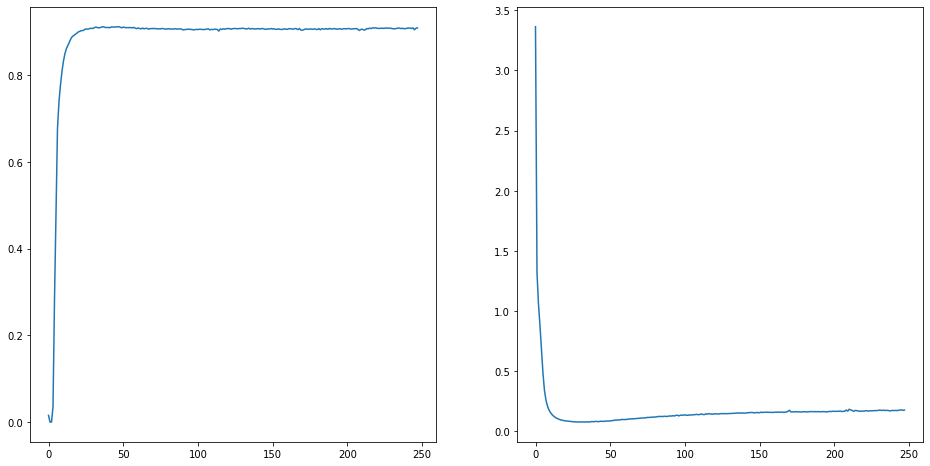

In [7]:
plot_curves(model)
del model,dl_train,dl_val

In [8]:
%%capture nop
model, (dl_train,dl_val) = mk4tknzr('WordPiece')
trainer = pl.Trainer(log_every_n_steps=2,gpus=GPU, max_epochs=2000, callbacks=[early_stopping(), checkpoints()])
trainer.fit(model, dl_train, dl_val)

0.8923746943473816 0.9008176326751709
0.23732396960258484 0.08859671652317047


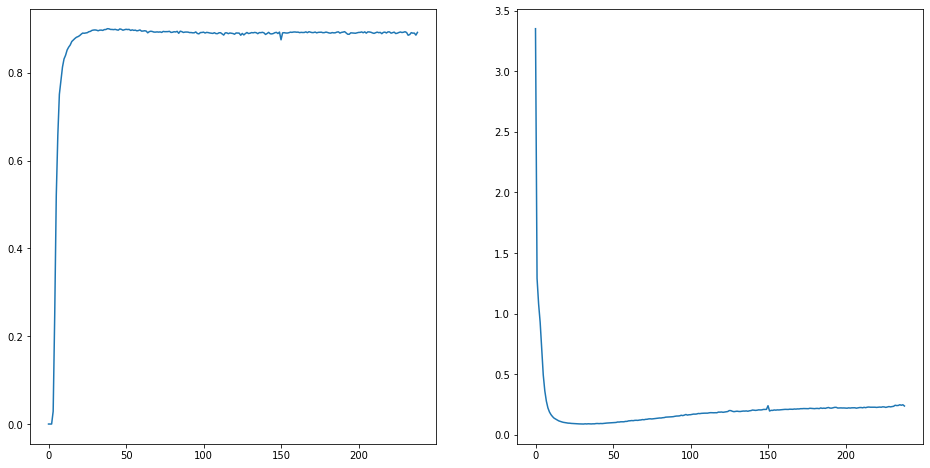

In [9]:
plot_curves(model)
del model,dl_train,dl_val

In [10]:
%%capture nop
model, (dl_train,dl_val) = mk4tknzr('BERT_pretrained')
trainer = pl.Trainer(log_every_n_steps=2,gpus=GPU, max_epochs=2000, callbacks=[early_stopping(), checkpoints()])
trainer.fit(model, dl_train, dl_val)

0.8774440288543701 0.901706337928772
0.35588309168815613 0.12394647300243378


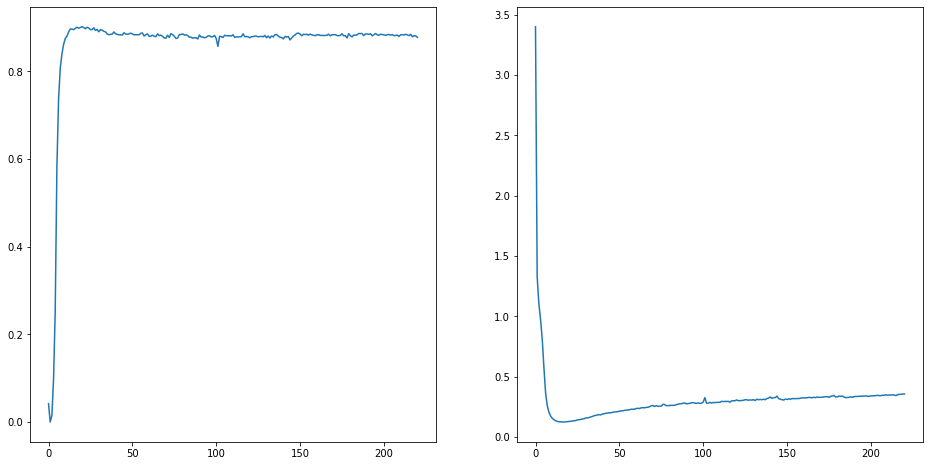

In [11]:
plot_curves(model)
del model,dl_train,dl_val

In [12]:
%%capture nop
model, (dl_train,dl_val) = mk4tknzr('DBERT_pretrained')
trainer = pl.Trainer(log_every_n_steps=2,gpus=GPU, max_epochs=2000, callbacks=[early_stopping(), checkpoints()])
trainer.fit(model, dl_train, dl_val)

RuntimeError: CUDA out of memory. Tried to allocate 12.17 GiB (GPU 0; 15.90 GiB total capacity; 6.13 GiB already allocated; 4.37 GiB free; 10.55 GiB reserved in total by PyTorch)

In [13]:
plot_curves(model)
del model,dl_train,dl_val

IndexError: list index out of range

In [ ]:
%%capture nop
model, (dl_train,dl_val) = mk4tknzr('ELECTRA_pretrained')
trainer = pl.Trainer(log_every_n_steps=2,gpus=GPU, max_epochs=2000, callbacks=[early_stopping(), checkpoints()])
trainer.fit(model, dl_train, dl_val)

In [ ]:
plot_curves(model)
del model,dl_train,dl_val

In [ ]:
%%capture nop
model, (dl_train,dl_val) = mk4tknzr('ROBERTA_pretrained')
trainer = pl.Trainer(log_every_n_steps=2,gpus=GPU, max_epochs=2000, callbacks=[early_stopping(), checkpoints()])
trainer.fit(model, dl_train, dl_val)

In [ ]:
plot_curves(model)
del model,dl_train,dl_val